<a href="https://colab.research.google.com/github/carogaltier/matplotlib-fonts/blob/main/matplotlib_font_families_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Matplotlib's Font Families: A Visual Guide

This interactive notebook provides a step-by-step tutorial to explore and visualize all the default font families available in Matplotlib. Understanding the different font options is crucial for customizing text appearance in your plots. This guide will help you to see how each font family renders text, including styles and potential issues with glyph rendering. Whether you are a beginner or an advanced user, this visualization tool will enhance your ability to design more readable and visually appealing plots.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import requests
import warnings  # Ensure warnings are available for handling in later cells
from IPython.display import display, Markdown
from scipy.interpolate import make_interp_spline
import matplotlib.patches as patches
import numpy as np

## Listing Default Fonts in Matplotlib

After importing the necessary libraries, the next step is to retrieve and list all the font families that are loaded by default in Matplotlib. This will give us a comprehensive overview of the text styling options available out-of-the-box.


In [ ]:
# Retrieve the list of all available font names
font_names = font_manager.get_font_names()

display(Markdown("### Available font names:"))
display(Markdown("\n".join([f"- {font}" for font in font_names])))

### Available font names:

- cmss10
- cmtt10
- cmsy10
- Liberation Serif
- Liberation Mono
- STIXNonUnicode
- cmr10
- STIXSizeFourSym
- cmmi10
- STIXSizeOneSym
- STIXSizeTwoSym
- cmb10
- STIXSizeThreeSym
- DejaVu Sans Mono
- DejaVu Serif
- Liberation Sans
- DejaVu Serif Display
- Humor Sans
- DejaVu Sans
- cmex10
- STIXGeneral
- Liberation Sans Narrow
- STIXSizeFiveSym
- DejaVu Sans Display

## Visualizing Font Families

We will visually explore each of the default font families available in Matplotlib. For each font, you will see how regular and italic styles render in a plot setting. This visual representation helps in assessing the appearance and usability of different fonts for various data visualization tasks.


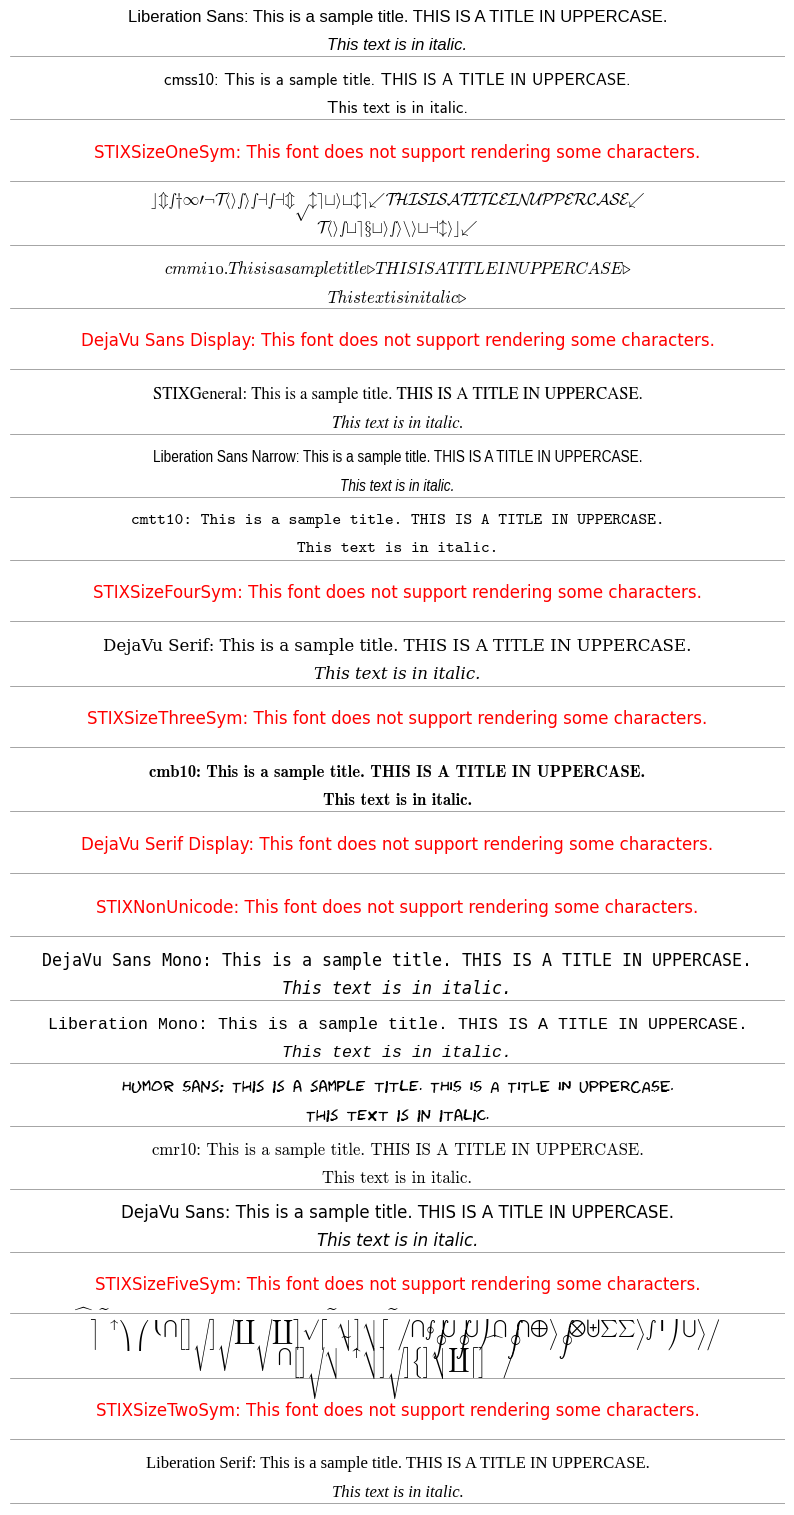

In [ ]:
# Lists to store fonts that render successfully and those that do not
fonts_with_complete_glyphs = []
fonts_with_missing_glyphs = []

# Set up the plotting environment to visualize each font family
plt.figure(figsize=(10, len(font_names) * 0.8))  # Adjusted vertical size for better visibility
plt.subplots_adjust(hspace=1)  # Increase spacing to accommodate descriptions

# Loop through each font to display sample text and track rendering success
for font_name in font_names:
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")  # Change filter to capture all warnings
        ax = plt.subplot(len(font_names), 1, font_names.index(font_name) + 1)

        try:
            # Display the font name with normal and italic text
            normal_text = f"{font_name}: This is a sample title. THIS IS A TITLE IN UPPERCASE."
            italic_text = "This text is in italic."  # Italic style for comparison

            # Render the text in the specified font
            ax.text(0.5, 1.3, normal_text, fontsize=12, ha='center', va='center', fontname=font_name)
            ax.text(0.5, 0.4, italic_text, fontsize=12, ha='center', va='center', fontname=font_name, style='italic')
            ax.axhline(y=0.05, color='grey', linewidth=0.5)
            plt.draw()  # Force drawing to handle potential warnings

            # Check for missing glyph warnings
            if any(['missing from current font' in str(warn.message) for warn in w]):
                raise ValueError("Missing glyphs in font")

        except ValueError:
            # Instead of printing, handle the error silently and add to the list
            fonts_with_missing_glyphs.append(font_name)
            ax.clear()
            error_message = f"{font_name}: This font does not support rendering some characters."
            ax.text(0.5, 1, error_message, fontsize=12, ha='center', va='center', color='red')
            ax.axhline(y=0.1, color='grey', linewidth=0.5)
        else:
            # If no exception was raised, add to the successful list
            fonts_with_complete_glyphs.append(font_name)

        # Clean up plot appearance by removing axes
        ax.axis('off')

# Display all plots
plt.show()

### Fonts with Rendering Issues

Below is the list of font families that do not support rendering some characters, which may cause issues in visual representations.


In [ ]:
# Define the list of special fonts with text rendering issues
fonts_with_text_rendering_issues = ['cmmi10', 'cmsy10', 'cmex10']

# Display the list of fonts that have missing glyphs
display(Markdown("### Fonts that not render all glyphs:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_missing_glyphs])))

display(Markdown("### Fonts with text rendering issues:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_text_rendering_issues])))

### Fonts that not render all glyphs:

- STIXSizeOneSym
- DejaVu Sans Display
- STIXSizeFourSym
- STIXSizeThreeSym
- DejaVu Serif Display
- STIXNonUnicode
- STIXSizeFiveSym
- STIXSizeTwoSym

### Fonts with text rendering issues:

- cmmi10
- cmsy10
- cmex10

### Successful Font Renderings

Next, we will display texts using the fonts that successfully rendered all characters. This helps to see which fonts can be reliably used in various applications.


In [ ]:
# Remove those fonts with rendering issues from the list of fonts that render successfully
fonts_with_complete_glyphs = [font for font in fonts_with_complete_glyphs if font not in fonts_with_text_rendering_issues]

# Display the list of fonts that have complete glyphs
display(Markdown("### Fonts that render successfully:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_complete_glyphs])))

### Fonts that render successfully:

- Liberation Sans
- cmss10
- STIXGeneral
- Liberation Sans Narrow
- cmtt10
- DejaVu Serif
- cmb10
- DejaVu Sans Mono
- Liberation Mono
- Humor Sans
- cmr10
- DejaVu Sans
- Liberation Serif

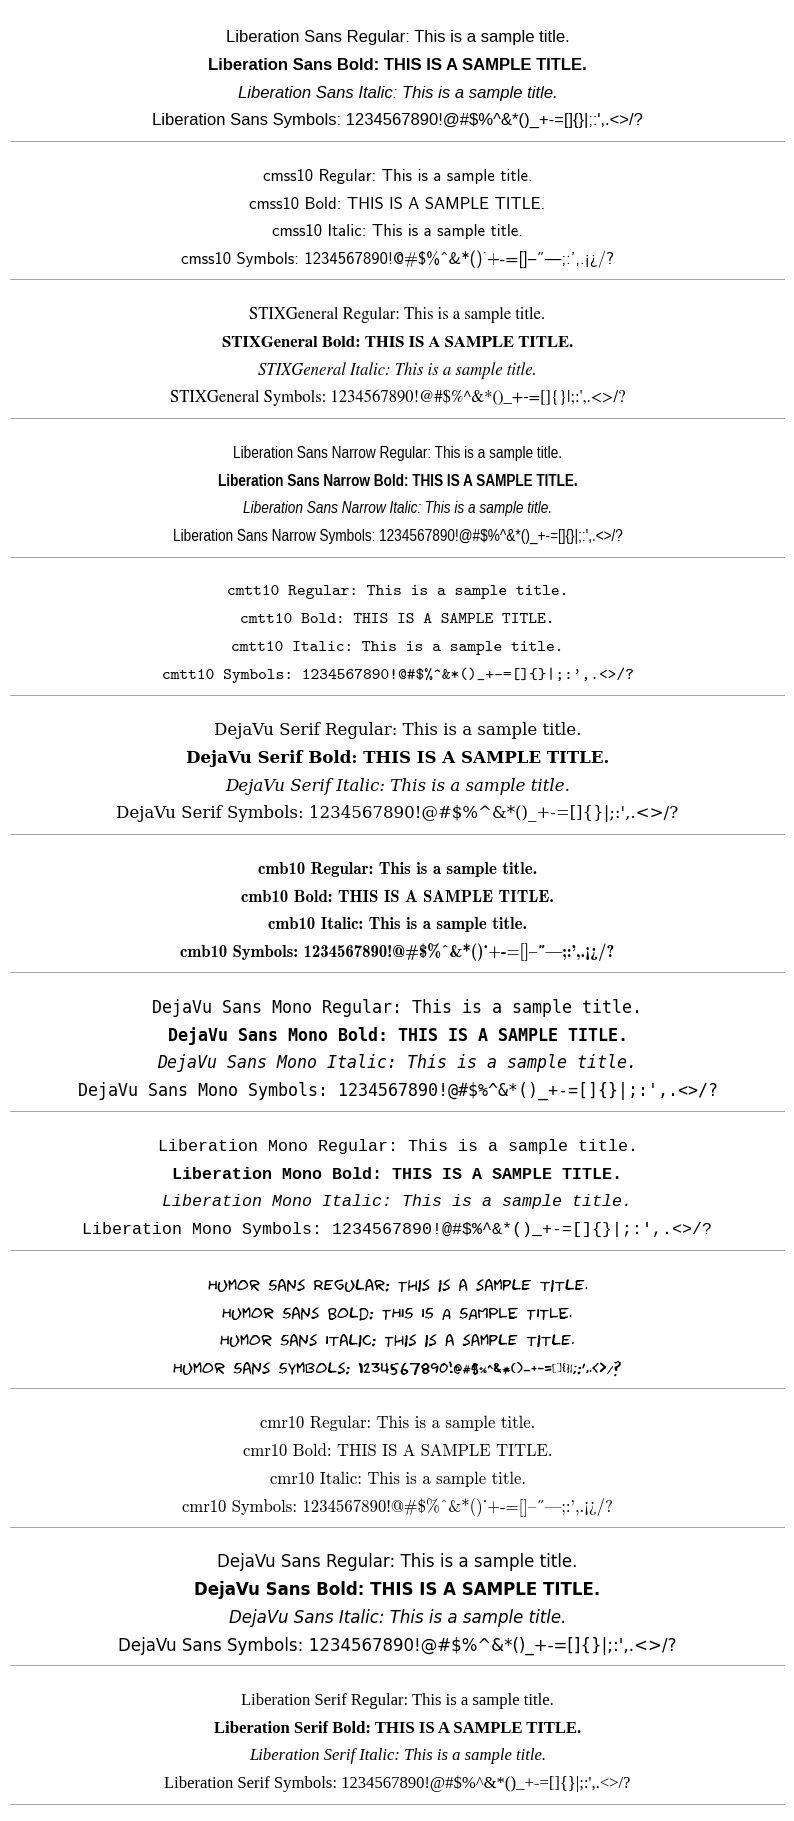

In [ ]:
# Display sample text using the fonts that rendered all glyphs successfully
plt.figure(figsize=(10, len(fonts_with_complete_glyphs) * 1.8))  # Adjusted vertical size for additional text lines
plt.subplots_adjust(hspace=0)  # Increased vertical spacing

for font_name in fonts_with_complete_glyphs:
    ax = plt.subplot(len(fonts_with_complete_glyphs), 1, fonts_with_complete_glyphs.index(font_name) + 1)

    # Display different styles of text
    ax.text(0.5, 0.8, f"{font_name} Regular: This is a sample title.", fontsize=12, ha='center', va='center', fontname=font_name)
    ax.text(0.5, 0.6, f"{font_name} Bold: THIS IS A SAMPLE TITLE.", fontsize=12, ha='center', va='center', fontname=font_name, weight='bold')
    ax.text(0.5, 0.4, f"{font_name} Italic: This is a sample title.", fontsize=12, ha='center', va='center', fontname=font_name, style='italic')

    # Display common symbols
    symbols_text = "1234567890!@#$%^&*()_+-=[]{}|;:',.<>/?"
    ax.text(0.5, 0.2, f"{font_name} Symbols: {symbols_text}", fontsize=12, ha='center', va='center', fontname=font_name)

    # Aesthetic lines and settings
    ax.axhline(y=0.05, color='grey', linewidth=0.5)
    ax.axis('off')

plt.show()

## Default Font Family

In data visualization, the choice of typography can significantly affect the readability and aesthetics of your graphics. Matplotlib comes with a default font family, which for most installations is **DejaVu Sans**. This font is widely used for its clarity and excellent rendering across various types of charts and platforms.

This section of the tutorial is designed to show you how Matplotlib's default font renders in a real-world context. This example uses the DejaVu Sans font family to demonstrate how you can configure and customize text appearance in your own visualizations.

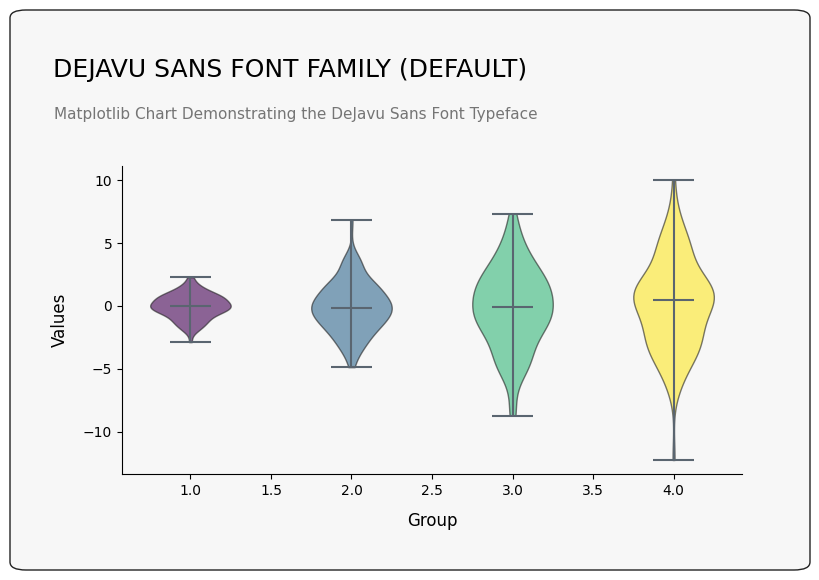

In [ ]:
# Set the random seed for reproducibility
np.random.seed(40)

# Generate random data
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_facecolor('#f7f7f7')  # Set the background color of the axes

# Adding a custom rectangle with rounded corners (border radius) around the figure
border_radius = 0.02

rect = patches.FancyBboxPatch((-0.015, -0.13), 1, 1.4,
                         transform=fig.transFigure, facecolor="#f7f7f7", edgecolor='#222',
                         linewidth=1, clip_on=False, zorder=-3, linestyle='-', boxstyle=f"round,pad=0,rounding_size={border_radius}")
fig.patches.extend([rect])

# Set the title and subtitle
fig.suptitle('DEJAVU SANS FONT FAMILY (DEFAULT)', fontsize=18, x=0.335, y=1.15, ha="center")
ax.set_title('Matplotlib Chart Demonstrating the DeJavu Sans Font Typeface',
             fontsize=11, color='#757575', x=0.28, y=1.125, ha="center")

# Create the violin plot
parts = plt.violinplot(data, showmeans=False, showmedians=True)

# Use the same color scale 'viridis' for the violins
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('#222')
    pc.set_alpha(0.6)

# Make whiskers (the lines extending from the violins) and median black
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor('#5a6570')  # Set the color to black
    vp.set_linewidth(1.5)  # Adjust line width if needed

plt.xlabel("Group", fontsize=12, labelpad=10)
plt.ylabel("Values", fontsize=12, labelpad=10)
plt.grid(False)

# Remove the top and right spines (axes lines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

## Alternative Matplotlib Fonts

Exploring different font families can  change the visual impact and clarity of your plots. This section introduces alternative font options in Matplotlib, particularly focusing on **Liberation Sans**, a popular choice for those seeking a clean and professional appearance in their visualizations. By changing the default font family, you can observe firsthand how alternative fonts render and affect the overall aesthetics of your plots.

### Setting the Font Family

```python
# Example of changing the default font family for future plots
plt.rcParams['font.family'] = ['Liberation Sans']
```

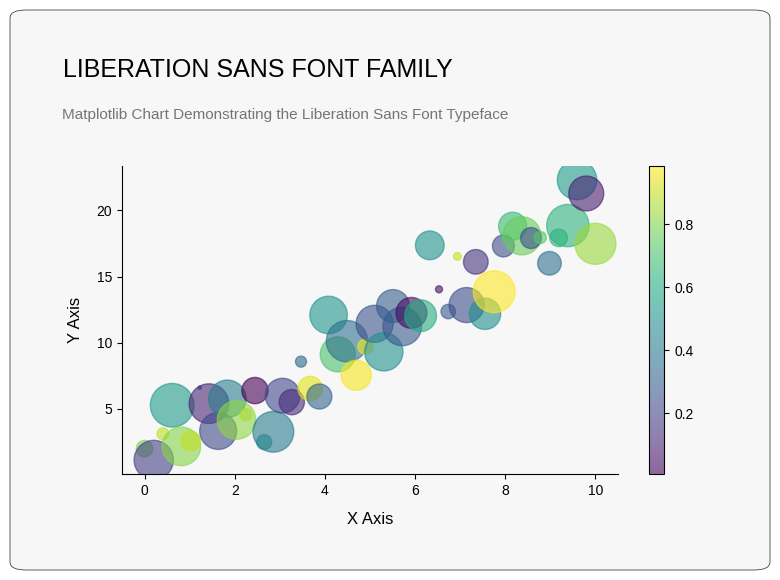

In [ ]:
# Example of changing the default font family for future plots
plt.rcParams['font.family'] = ['Liberation Sans']

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data controlled by the seed
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.randn(50) * 2  # Uses np.random.randn with the seed
sizes = 1000 * np.random.rand(50)         # Uses np.random.rand with the seed
colors = np.random.rand(50)               # Colors also with np.random.rand

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_facecolor('#f7f7f7')  # Set the background color of the axes

# Adding a custom rectangle with rounded corners (border radius) around the figure
border_radius = 0.02

rect = patches.FancyBboxPatch((-0.015, -0.13), 0.95, 1.4,
                         transform=fig.transFigure, facecolor="#f7f7f7", edgecolor='#222',
                         linewidth=0.5, clip_on=False, zorder=-3, linestyle='-', boxstyle=f"round,pad=0,rounding_size={border_radius}")
fig.patches.extend([rect])

# Set the title and subtitle
fig.suptitle('LIBERATION SANS FONT FAMILY', fontsize=18, x=0.295, y=1.15, ha="center")
ax.set_title('Matplotlib Chart Demonstrating the Liberation Sans Font Typeface',
             fontsize=11, color='#757575', x=0.33, y=1.125, ha="center")

# Create the scatter plot
scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')

# Add color bar
plt.colorbar(scatter)

# Customize the plot style
plt.xlabel("X Axis", fontsize=12, labelpad=10)
plt.ylabel("Y Axis", fontsize=12, labelpad=10)
plt.grid(False)

# Get the current axis object
ax = plt.gca()

# Remove the top and right spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

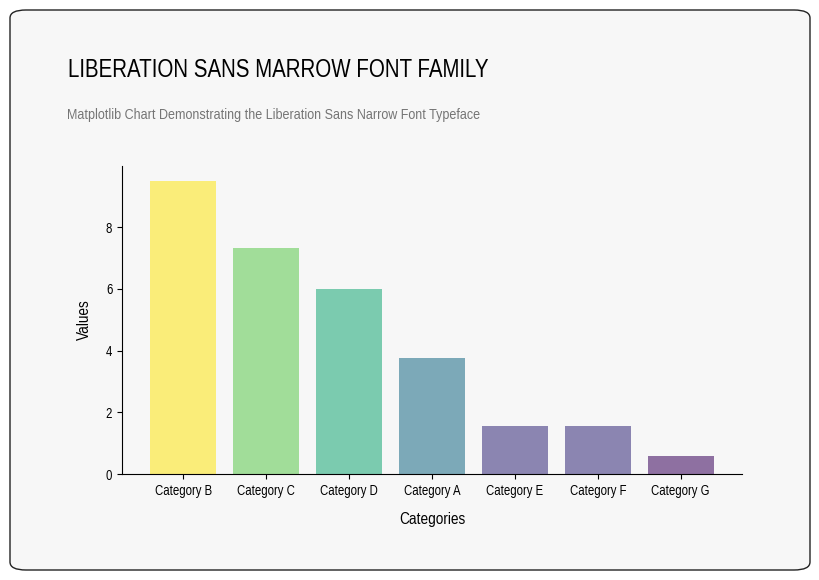

In [ ]:
# Example of changing the default font family for future plots
plt.rcParams['font.family'] = ['Liberation Sans']

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data controlled by the seed
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.randn(50) * 2  # Uses np.random.randn with the seed
sizes = 1000 * np.random.rand(50)         # Uses np.random.rand with the seed
colors = np.random.rand(50)               # Colors also with np.random.rand

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_facecolor('#f7f7f7')  # Set the background color of the axes

# Adding a custom rectangle with rounded corners (border radius) around the figure
border_radius = 0.02

rect = patches.FancyBboxPatch((-0.015, -0.13), 0.95, 1.4,
                         transform=fig.transFigure, facecolor="#f7f7f7", edgecolor='#222',
                         linewidth=0.5, clip_on=False, zorder=-3, linestyle='-', boxstyle=f"round,pad=0,rounding_size={border_radius}")
fig.patches.extend([rect])

# Set the title and subtitle
fig.suptitle('LIBERATION SANS FONT FAMILY', fontsize=18, x=0.295, y=1.15, ha="center")
ax.set_title('Matplotlib Chart Demonstrating the Liberation Sans Font Typeface',
             fontsize=11, color='#757575', x=0.33, y=1.125, ha="center")

# Create the scatter plot
scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')

# Add color bar
plt.colorbar(scatter)

# Customize the plot style
plt.xlabel("X Axis", fontsize=12, labelpad=10)
plt.ylabel("Y Axis", fontsize=12, labelpad=10)
plt.grid(False)

# Get the current axis object
ax = plt.gca()

# Remove the top and right spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

## Custom Font Families

Integrating custom fonts into your Matplotlib charts can enhance the uniqueness and visual appeal of your data visualizations. This section walks through the process of downloading a custom font, adding it to Matplotlib's font manager, and using it in your plots. The example uses the **Poppins** font family, known for its modern and readable style, which is excellent for both web and print media.

In [ ]:
# Download and save the font file directly
font_url = 'https://www.1001fonts.com/download/font/poppins.regular.ttf'
font_path = 'poppins.ttf'

with open(font_path, 'wb') as f:
    f.write(requests.get(font_url).content)

# Add the downloaded font to Matplotlib's font manager
fm.fontManager.addfont(font_path)

# Set the downloaded font as the default for all plots
plt.rc('font', family='Poppins')

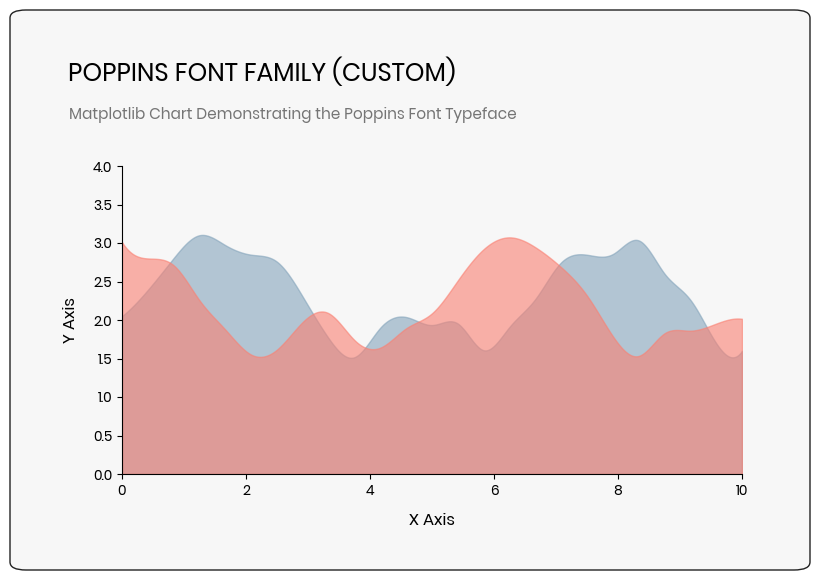

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data (e.g., for two time series)
x = np.linspace(0, 10, 25)  # Fewer points to emphasize smoothing
y1 = 1.5 + np.abs(np.sin(x) + 0.5 + 0.1 * np.random.randn(25))  # First area plot
y2 = 1.5 + np.abs(np.cos(x) + 0.5 + 0.1 * np.random.randn(25))  # Second area plot

# Interpolation to smooth the curves with a higher number of points
x_smooth = np.linspace(x.min(), x.max(), 1000)  # More points for an even smoother curve
y1_smooth = make_interp_spline(x, y1)(x_smooth)  # Spline interpolation for y1
y2_smooth = make_interp_spline(x, y2)(x_smooth)  # Spline interpolation for y2

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_facecolor('#f7f7f7')  # Set the background color of the axes


# Adding a custom rectangle with rounded corners (border radius) around the figure
border_radius = 0.02

rect = patches.FancyBboxPatch((-0.015, -0.13), 1, 1.4,
                         transform=fig.transFigure, facecolor="#f7f7f7", edgecolor='#222',
                         linewidth=1, clip_on=False, zorder=-3, linestyle='-',
                              boxstyle=f"round,pad=0,rounding_size={border_radius}")
fig.patches.extend([rect])

# Set the title and subtitle
fig.suptitle('POPPINS FONT FAMILY (CUSTOM)', fontsize=18, x=0.3, y=1.15, ha="center")
ax.set_title('Matplotlib Chart Demonstrating the Poppins Font Typeface',
             fontsize=11, color='#757575', x=0.275, y=1.125, ha="center")



# Plot the first area (blue) with some transparency
plt.fill_between(x_smooth, y1_smooth, color='#84a4bb', alpha=0.6, label='sin(x) + noise (smooth)')

# Plot the second area (red) with some transparency
plt.fill_between(x_smooth, y2_smooth, color='salmon', alpha=0.6, label='cos(x) + noise (smooth)')

plt.xlabel("X Axis", fontsize=12, labelpad=10)
plt.ylabel("Y Axis", fontsize=12, labelpad=10)
plt.grid(False)


# Set the x-axis and y-axis
plt.ylim(0, 4)
plt.xlim(0, 10)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

## Conclusion

By exploring the various font families available in Matplotlib as demonstrated above, you can choose the appropriate text style for your graphical presentations. Remember that not all fonts support every glyph, which is crucial when working with diverse datasets. Adjust the default font family as needed to ensure your plots are both functional and visually appealing.
